
## Holt-Winters Exponentielle Glätttung (Übung)

Manuals:

* Exponentielle Glättung, Beispiele: https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html
* statsmodels.tsa.holtwinters.ExponentialSmoothing: https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html
* .fit: https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.fit.html#statsmodels.tsa.holtwinters.ExponentialSmoothing.fit
* .forecast: https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.HoltWintersResults.forecast.html#statsmodels.tsa.holtwinters.HoltWintersResults.forecast
* results: https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.HoltWintersResults.html#statsmodels.tsa.holtwinters.HoltWintersResults



### Vorhersage von Passagierzahlen



In [1]:
%reset -f

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

fn = 'data/a10.csv'

df = pd.read_csv(fn, parse_dates=['date'], index_col='date')
df=df.resample("MS").agg('mean')
df.head(3)

/home/rp/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221


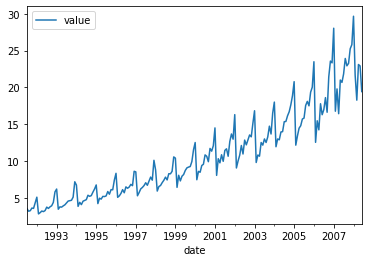

In [2]:
df.plot()
plt.show()


In [3]:
dgh = ExponentialSmoothing(df, trend='add',  seasonal='add', use_boxcox=True,
                           seasonal_periods=12).fit() #  method = 'ls') 

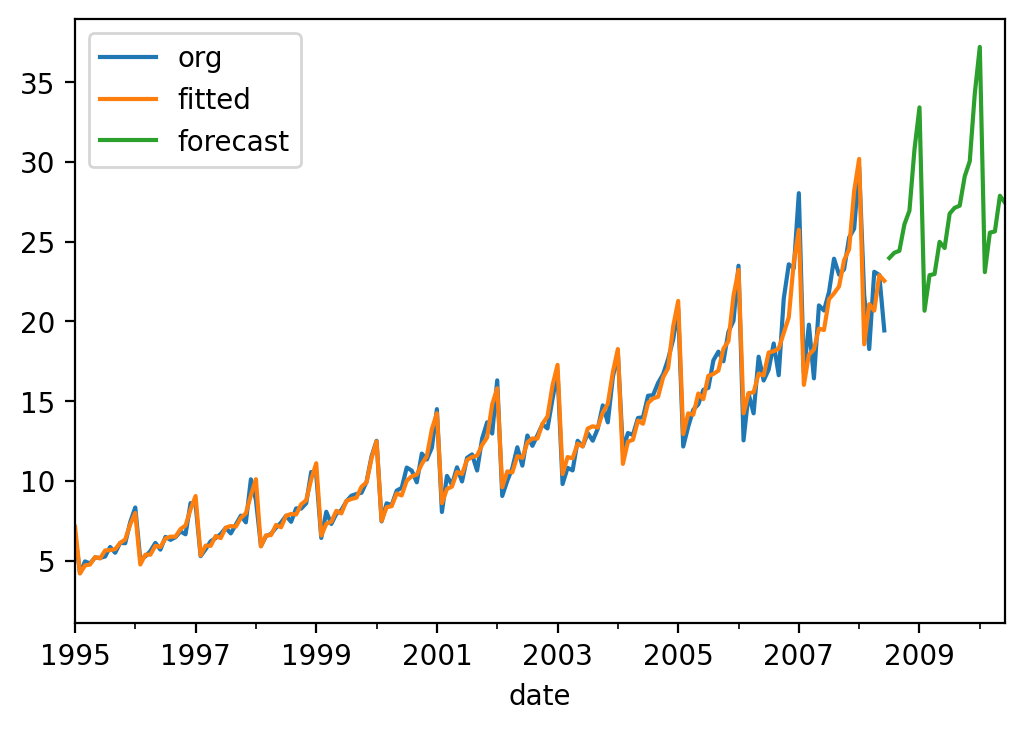

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8816417619137701
       x: [ 1.560e-01  5.256e-17 ... -6.843e-02 -9.858e-02]
     nit: 19
     jac: [ 4.657e-03  1.369e-01 ...  1.808e-03 -2.173e-03]
    nfev: 364
    njev: 19
                     name         param  optimized
smoothing_level     alpha  1.560130e-01       True
smoothing_trend      beta  5.255731e-17       True
smoothing_seasonal  gamma  5.143026e-16       True
initial_level         l.0  1.230314e+00       True
initial_trend         b.0  1.115596e-02       True
initial_seasons.0     s.0 -7.175022e-03       True
initial_seasons.1     s.1 -1.749845e-03       True
initial_seasons.2     s.2 -6.942015e-03       True
initial_seasons.3     s.3  6.212721e-02       True
initial_seasons.4     s.4  9.041063e-02       True
initial_seasons.5     s.5  2.427409e-01       True
initial_seasons.6     s.6  3.337277e-01       True
initial_seasons.7     s.7 -2.648705e-01       True
initial_seasons.8     s

Dep. Variable:,value,No. Observations:,204
Model:,ExponentialSmoothing,SSE,128.876
Optimized:,True,AIC,-61.691
Trend:,Additive,BIC,-8.602
Seasonal:,Additive,AICC,-57.994
Seasonal Periods:,12,Date:,"Tue, 06 Feb 2024"
Box-Cox:,True,Time:,14:07:45
Box-Cox Coeff.:,0.06151,,
,coeff,code,optimized
smoothing_level,0.1560130,alpha,True
smoothing_trend,5.2557e-17,beta,True


In [4]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
df.plot(ax=ax)
dgh.fittedvalues.plot()
dgh.forecast(24).plot()
ax.set_xlim(300,)
ax.legend(['org', 'fitted', 'forecast'])
plt.show()

print(dgh.mle_retvals)
print(dgh.params_formatted)
dgh.summary()
